### Implement a One-Layer Neural Network

In [67]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn import datasets

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# from tensorflow.python.framework import ops
# ops.reset_default_graph()

sess = tf.Session()

In [68]:
iris = datasets.load_iris()

# sepal length, sepal width, pedal length
x_vals = np.array([x[0:3] for x in iris.data])
# pedal width for the target
y_vals = np.array([x[3] for x in iris.data])


x_vals.shape

(150, 3)

In [69]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [70]:
# split training and testing data
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
y_vals_train = y_vals[train_indices]
# x_vals_train = x_vals
# y_vals_train = y_vals

x_vals_test = x_vals[test_indices]
y_vals_test = y_vals[test_indices]

def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

# fill nan value with normalize cols
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [71]:
# batch size
batch_size = 50

# placeholder - input / output
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)


In [72]:
# 5 nodes
hidden_layer_nodes = 5

# variable of hidden layer A1: shape=(3,5) b1: shape(5,)
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))

# variable of output layer A2: shape(5, 1) b2: shape(1,)
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [73]:
# activation of hidden layer
# ReLU(X1 * A1 + b1)
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
# activtion of output layer
# ReLU(X2 * A2 + b2)
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [74]:
# loss function of output layer: mean square error
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [75]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [76]:
loss_vec = []
test_loss = []

for i in range(500):
    rand_indices = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_indices]
    rand_y = np.transpose([y_vals_train[rand_indices]])
    
    # training
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    # save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    # run the test-set loss and save it
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, 
                                               y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    
    if (i+1) % 50 == 0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 2.2275999
Generation: 100. Loss = 1.9737717
Generation: 150. Loss = 2.455
Generation: 200. Loss = 2.1728687
Generation: 250. Loss = 1.9766
Generation: 300. Loss = 2.7585998
Generation: 350. Loss = 1.7947999
Generation: 400. Loss = 1.5603999
Generation: 450. Loss = 2.1513274
Generation: 500. Loss = 2.0449212


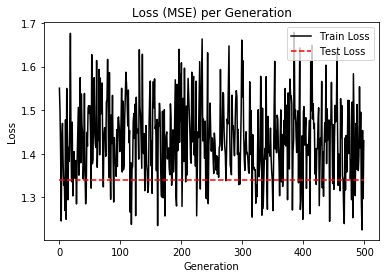

In [77]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()